In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df = pd.read_csv('Housing.csv')
print(df.head())
# print(df.describe())
# print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [6]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.head())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2            

In [12]:
#data preprocessing
le_mainroad = LabelEncoder()
le_guestroom = LabelEncoder()
le_basement = LabelEncoder()
le_hotwaterheating = LabelEncoder()
le_airconditioning = LabelEncoder()
le_prefarea = LabelEncoder()
le_furnishingstatus = LabelEncoder()

df['mainroad'] = le_mainroad.fit_transform(df['mainroad'])
df['guestroom'] = le_guestroom.fit_transform(df['guestroom'])
df['basement'] = le_basement.fit_transform(df['basement'])
df['hotwaterheating'] = le_hotwaterheating.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le_airconditioning.fit_transform(df['airconditioning'])
df['prefarea'] = le_prefarea.fit_transform(df['prefarea'])
df['furnishingstatus'] = le_furnishingstatus.fit_transform(df['furnishingstatus'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None


In [13]:
X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)


In [17]:
print("mean squered error = ",mean_squared_error(y_test,y_pred))
print("R2 score = ",r2_score(y_test,y_pred))

mean squered error =  1771751116594.0347
R2 score =  0.6494754192267804


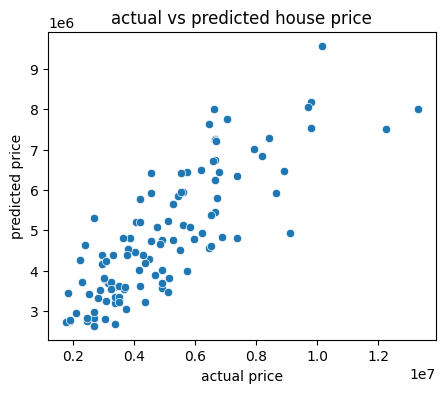

In [19]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=y_test,y=y_pred)
plt.title("actual vs predicted house price")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()